# Data Processing

Step by step proposal for cleaning and preprocessing enumerated below.

For each dataset:
- Generate summary statistics and initial visualizations to familiarize ourselves with the data
- Remove duplicate records
- Impute any values when it makes sense 
- Remove rows with a majority of missing values
- Winsorize data for numerical outliers
- Conduct entity resolution followed by data cleaning to standardize data and resolve any string discrepancies 
- For song_id’s with differing attribute values, we plan to average the numerical values and append this to our final joined dataset
- One-hot encode categorical variables
- Join two datasets (on spotify id which appears in both datasets)
- If a record does not appear in the larger dataset, we look to append it entirely to the final table

## Importing Packages and Loading Data

In [153]:
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df1 = pd.read_csv("data/tracks_features.csv")
df2 = pd.read_csv("data/genres_v2.csv")

/var/folders/pq/0f182j492d77k8y748jtc48r0000gn/T/ipykernel_63674/749257777.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("data/genres_v2.csv")


In [155]:
df1.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [156]:
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Summary Statistics

In [157]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [160]:
summary_stats_df1 = df1.describe().transpose()
summary_stats_df1

,count,mean,std,min,25%,50%,75%,max
track_number,1204025.0,7.656352,5.994977,1.0,3.000000,7.00000,10.0000,50.000
disc_number,1204025.0,1.055906,0.295375,1.0,1.000000,1.00000,1.0000,13.000
danceability,1204025.0,0.493057,0.189669,0.0,0.356000,0.50100,0.6330,1.000
energy,1204025.0,0.509536,0.294684,0.0,0.252000,0.52400,0.7660,1.000
key,1204025.0,5.194151,3.536731,0.0,2.000000,5.00000,8.0000,11.000
loudness,1204025.0,-11.808703,6.982132,-60.0,-15.254000,-9.79100,-6.7170,7.234
mode,1204025.0,0.671459,0.469683,0.0,0.000000,1.00000,1.0000,1.000
speechiness,1204025.0,0.084382,0.115991,0.0,0.035100,0.04460,0.0723,0.969
acousticness,1204025.0,0.446751,0.385201,0.0,0.037600,0.38900,0.8610,0.996
instrumentalness,1204025.0,0.282861,0.376284,0.0,0.000008,0.00808,0.7190,1.000


In [161]:
summary_stats_df2 = df2.describe().transpose()
summary_stats_df2

,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
key,42305.0,5.370240,3.666145,0.000000,1.00000,6.00000,9.000,11.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
mode,42305.0,0.549462,0.497553,0.000000,0.00000,1.00000,1.000,1.000
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988


## Dropping Irrelevant Columns

We immediately know we will not need `analysis_url` and `uri` in `df2`.

In [162]:
df2["track_href"].values

array(['https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx',
       'https://api.spotify.com/v1/tracks/7pgJBLVz5VmnL7uGHmRj6p',
       'https://api.spotify.com/v1/tracks/0vSWgAlfpye0WCGeNmuNhy', ...,
       'https://api.spotify.com/v1/tracks/72DAt9Lbpy9EUS29OzQLob',
       'https://api.spotify.com/v1/tracks/6HXgExFVuE1c3cq9QjFCcU',
       'https://api.spotify.com/v1/tracks/6MAAMZImxcvYhRnxDLTufD'],
      dtype=object)

In [163]:
df2["analysis_url"].values

array(['https://api.spotify.com/v1/audio-analysis/2Vc6NJ9PW9gD9q343XFRKx',
       'https://api.spotify.com/v1/audio-analysis/7pgJBLVz5VmnL7uGHmRj6p',
       'https://api.spotify.com/v1/audio-analysis/0vSWgAlfpye0WCGeNmuNhy',
       ...,
       'https://api.spotify.com/v1/audio-analysis/72DAt9Lbpy9EUS29OzQLob',
       'https://api.spotify.com/v1/audio-analysis/6HXgExFVuE1c3cq9QjFCcU',
       'https://api.spotify.com/v1/audio-analysis/6MAAMZImxcvYhRnxDLTufD'],
      dtype=object)

In [164]:
df2["track_href"].values

array(['https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx',
       'https://api.spotify.com/v1/tracks/7pgJBLVz5VmnL7uGHmRj6p',
       'https://api.spotify.com/v1/tracks/0vSWgAlfpye0WCGeNmuNhy', ...,
       'https://api.spotify.com/v1/tracks/72DAt9Lbpy9EUS29OzQLob',
       'https://api.spotify.com/v1/tracks/6HXgExFVuE1c3cq9QjFCcU',
       'https://api.spotify.com/v1/tracks/6MAAMZImxcvYhRnxDLTufD'],
      dtype=object)

In [165]:
df2.drop(["analysis_url", "uri", "type", "track_href"], axis=1, inplace=True)

## Removing Duplicates

In [166]:
duplicates_df1 = df1[df1.duplicated()]
print("Duplicates in df1:")
print(duplicates_df1)

duplicates_df2 = df2[df2.duplicated()]
print("\nDuplicates in df2:")
print(duplicates_df2)

Duplicates in df1:
Empty DataFrame
Columns: [id, name, album, album_id, artists, artist_ids, track_number, disc_number, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, year, release_date]
Index: []

Duplicates in df2:
Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, id, duration_ms, time_signature, genre, song_name, Unnamed: 0, title]
Index: []


In [167]:
missing_values_df1 = df1.isnull().sum()
print("Missing values in df1:")
print(missing_values_df1)

Missing values in df1:
id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64


## Checking for Nulls

In [168]:
missing_values_df2 = df2.isnull().sum()
print("\nMissing values in df2:")
print(missing_values_df2)


Missing values in df2:
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
id                      0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [169]:
overlap_count = df1["id"].isin(df2["id"]).sum()
overlap_count

2419

In [170]:
df2["title"]

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                                     NaN
14                                                     NaN
15                                                     NaN
16                                                     N

While checking for nulls we run into a couple of problems. First, many songs in the smaller database lack titles. We look to infer these under the assumption that the `id` should be the same across both `df1` and `df2`, but that is not necessarily the case. We check this by counting the number of rows with `id` that is in both dataframes, and find that only 2419 id's overlap. This means that approximately 38000 ids are novel, but a good chunk of these lack song_names and thus may be unusable for playlist generation and other tasks that our app hopes to offer. 

Additionally, we note that there are no numerical rows that need to be imputed. Missing values in terms of names, albums, etc. cannot be reasonably imputed. In order to simplify our analysis, we choose to drop all rows with missing values from both df1 and df2.

Closer inspection of `df2` reveals that some playlist data is mixed with the song data, and therefore we need to drop the columns `Unnamed: 0` and `title` and only keep `song_name` which is what we care about. This is not a problem with `df1`, and therefore we can go ahead and directly drop the few rows with missing columns.

In [171]:
df1 = df1.dropna()

df2.drop(["Unnamed: 0", "title"], axis=1, inplace=True)
df2 = df2.dropna()

print(len(df1))
print(len(df2))

1204012
21519


## Winsorize ?

In [172]:
# def winsorize_columns(df, columns, limits=(0.05, 0.05)):
#     for col in columns:
#         df[col] = winsorize(df[col], limits=limits)
#     return df

# numerical_cols_df1 = df1.select_dtypes(include='number').columns
# numerical_cols_df2 = df2.select_dtypes(include='number').columns

# df1[numerical_cols_df1] = winsorize_columns(df1[numerical_cols_df1], numerical_cols_df1)

# df2[numerical_cols_df2] = winsorize_columns(df2[numerical_cols_df2], numerical_cols_df2)

While we initially mentioned winsorizing our data, many of the features were already normalized, and others did not make sense to winsorize (e.g. track number). Therefore, we choose to not execute this preprocessing step because it does not make sense for our data purposes

## One-hot Encoding

The only categorical variable we need to encode is the `explicit` flag in `df1`.

In [173]:
df1 = pd.get_dummies(df1, columns=["explicit"], drop_first=True, dtype=int)

In [174]:
df1.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,explicit_True
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02,0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02,1
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02,0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02,1
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02,0


## Entity Resolution

In the code below, we attempt to visualize the distributions of many important features across both datasets. It is difficult to see if there is a significant difference between `df1` and `df2`, but peaks of distributions and spread is roughly similar (in addition to similar ranges and summary statistics from earlier), so we will go ahead and leave these features as is.

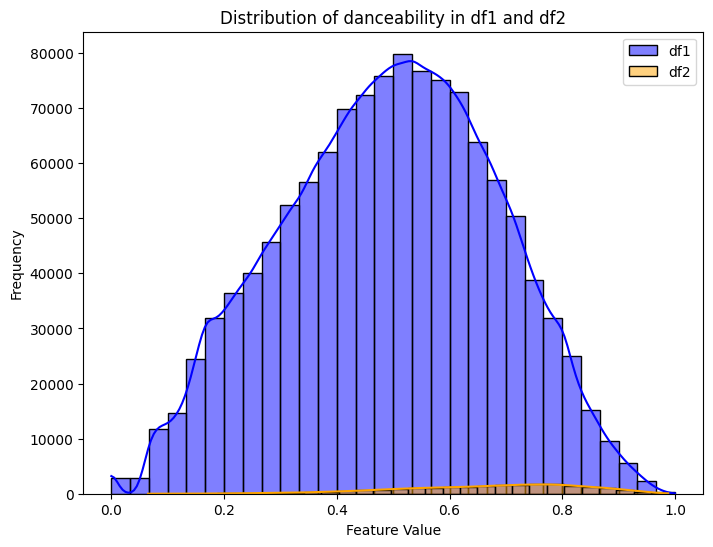

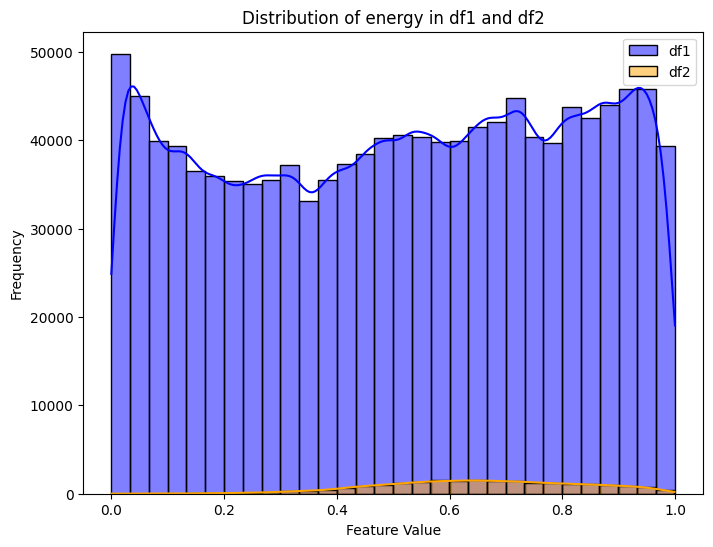

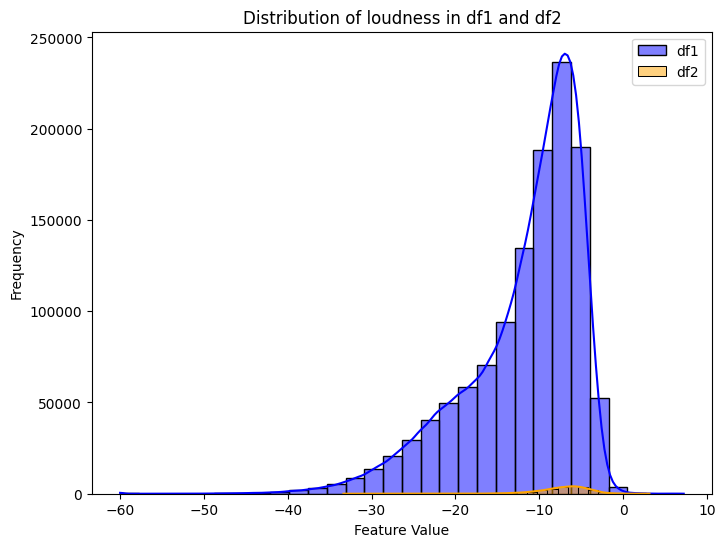

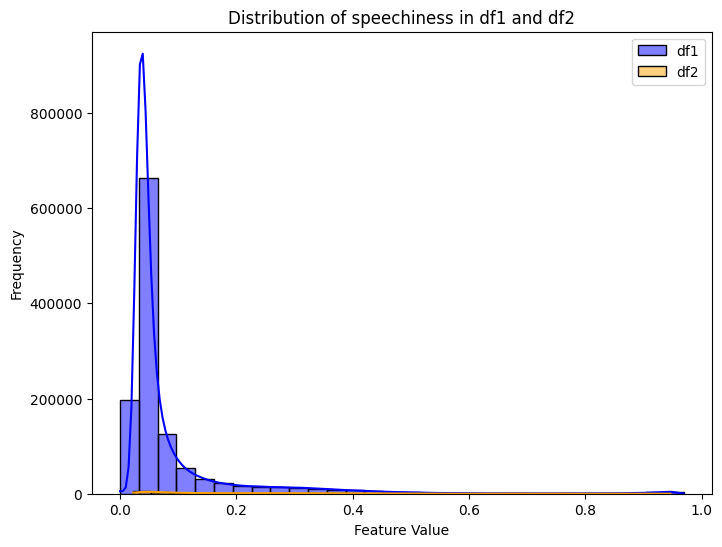

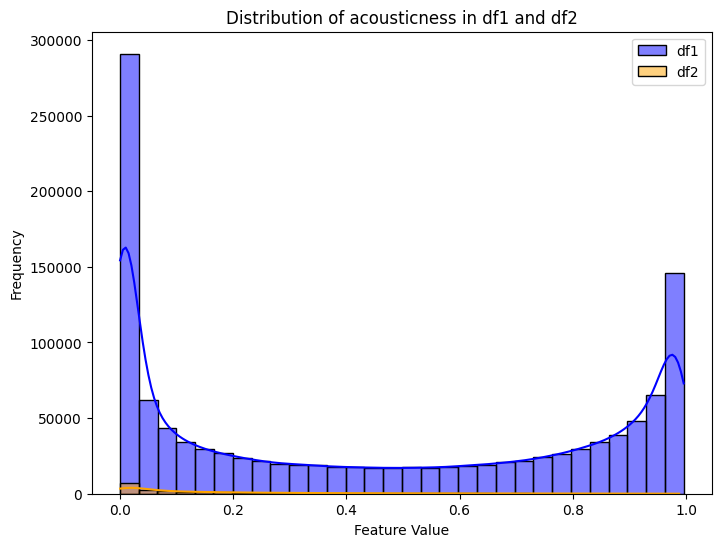

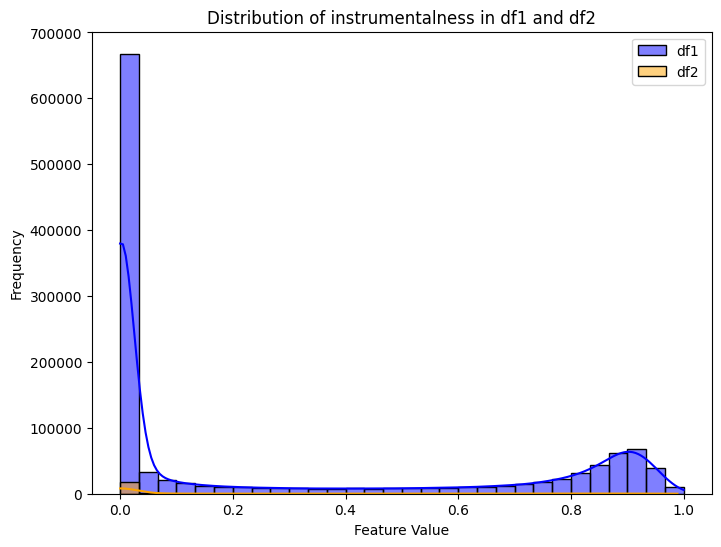

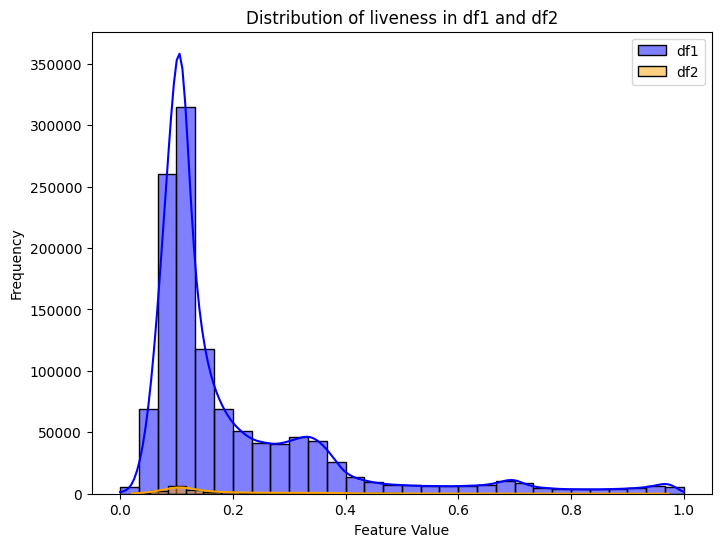

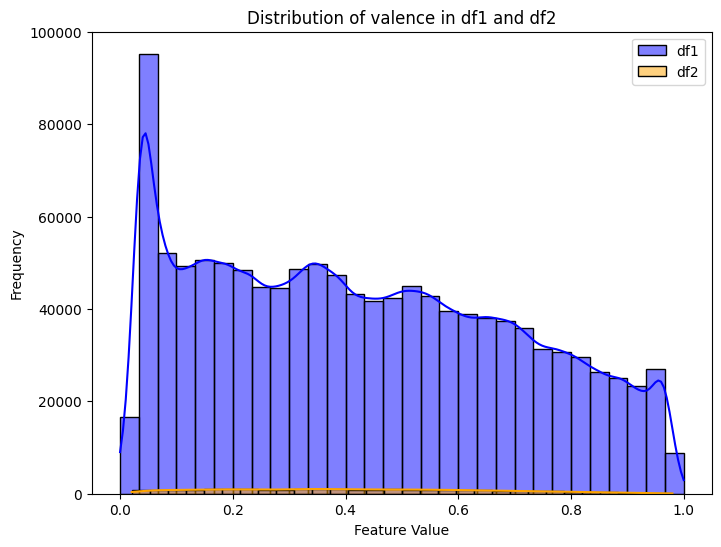

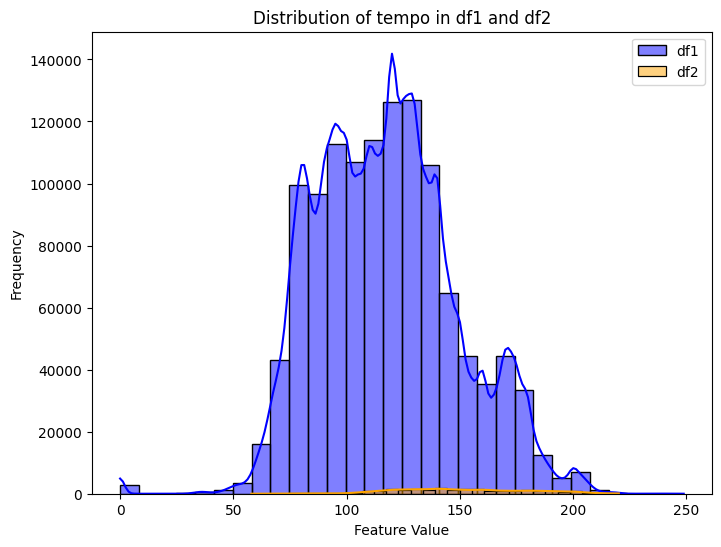

In [175]:
selected_columns = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[column], kde=True, label="df1", color="blue", bins=30)
    sns.histplot(df2[column], kde=True, label="df2", color="orange", bins=30)
    plt.title(f"Distribution of {column} in df1 and df2")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

## Joining Datasets

Because our datasets are very similar, it is better to append one to another and then clean the combined dataframe, rather than trying any type of outer join which may double the number of columns that we have.

In [176]:
df2.rename(columns={"song_name": "name"}, inplace=True)

In [177]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [178]:
combined_df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,explicit_True,genre
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.0,1.0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999.0,1999-11-02,0.0,NaN
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2.0,1.0,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999.0,1999-11-02,1.0,NaN
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3.0,1.0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999.0,1999-11-02,0.0,NaN
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4.0,1.0,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999.0,1999-11-02,1.0,NaN
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5.0,1.0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999.0,1999-11-02,0.0,NaN


In [179]:
df2["genre"].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop'], dtype=object)

In [180]:
combined_df.drop("genre", axis=1, inplace=True)

In [181]:
rows_with_null = combined_df[combined_df.isnull().any(axis=1)]
rows_with_null.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,explicit_True
1204012,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde,NaN,NaN,NaN,NaN,NaN,NaN,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4.0,NaN,NaN,NaN
1204013,7pgJBLVz5VmnL7uGHmRj6p,Pathology,NaN,NaN,NaN,NaN,NaN,NaN,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4.0,NaN,NaN,NaN
1204014,0vSWgAlfpye0WCGeNmuNhy,Symbiote,NaN,NaN,NaN,NaN,NaN,NaN,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4.0,NaN,NaN,NaN
1204015,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,NaN,NaN,NaN,NaN,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3.0,NaN,NaN,NaN
1204016,4jCeguq9rMTlbMmPHuO7S3,Venom,NaN,NaN,NaN,NaN,NaN,NaN,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4.0,NaN,NaN,NaN


While there are many columns with null values in a small subset of rows, we decide to leave these in. This increases the number of songs we have, and we are thinking about whether or not to use the Spotify API or ChatGPT to impute values for these columns.

In [183]:
combined_df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,explicit_True
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1.0,1.0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999.0,1999-11-02,0.0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2.0,1.0,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999.0,1999-11-02,1.0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3.0,1.0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999.0,1999-11-02,0.0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4.0,1.0,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999.0,1999-11-02,1.0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5.0,1.0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999.0,1999-11-02,0.0


## Removing Duplicates Post-Append

In [187]:
combined_df = combined_df.drop_duplicates(subset=["id", "name"], keep="first")

In [188]:
len(combined_df)

1220281

## Exporting Data

In [190]:
combined_df.to_csv("data/clean_data.csv", index=False)